<a href="https://colab.research.google.com/github/archie-cm/Credit_Score_Home_Credit_Indonesia/blob/main/Credit_Score_Home_Credit_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Base
import pandas as pd
import numpy as np

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Disable Warnings
import warnings
warnings.filterwarnings('ignore')

#Preprocessing
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report,accuracy_score,recall_score,precision_score,f1_score,average_precision_score

In [4]:
# application_train
df_train = pd.read_csv("/content/application_train.csv")
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df_train.shape

(307511, 122)

In [6]:
for  i in df_train.columns:
  print(i, 'type'+' : ', df_train[i].dtype)

SK_ID_CURR type :  int64
TARGET type :  int64
NAME_CONTRACT_TYPE type :  object
CODE_GENDER type :  object
FLAG_OWN_CAR type :  object
FLAG_OWN_REALTY type :  object
CNT_CHILDREN type :  int64
AMT_INCOME_TOTAL type :  float64
AMT_CREDIT type :  float64
AMT_ANNUITY type :  float64
AMT_GOODS_PRICE type :  float64
NAME_TYPE_SUITE type :  object
NAME_INCOME_TYPE type :  object
NAME_EDUCATION_TYPE type :  object
NAME_FAMILY_STATUS type :  object
NAME_HOUSING_TYPE type :  object
REGION_POPULATION_RELATIVE type :  float64
DAYS_BIRTH type :  int64
DAYS_EMPLOYED type :  int64
DAYS_REGISTRATION type :  float64
DAYS_ID_PUBLISH type :  int64
OWN_CAR_AGE type :  float64
FLAG_MOBIL type :  int64
FLAG_EMP_PHONE type :  int64
FLAG_WORK_PHONE type :  int64
FLAG_CONT_MOBILE type :  int64
FLAG_PHONE type :  int64
FLAG_EMAIL type :  int64
OCCUPATION_TYPE type :  object
CNT_FAM_MEMBERS type :  float64
REGION_RATING_CLIENT type :  int64
REGION_RATING_CLIENT_W_CITY type :  int64
WEEKDAY_APPR_PROCESS_START ty

# EDA


Text(0.5, 1.0, 'Phân bổ khả năng trả nợ của khách hàng\n')

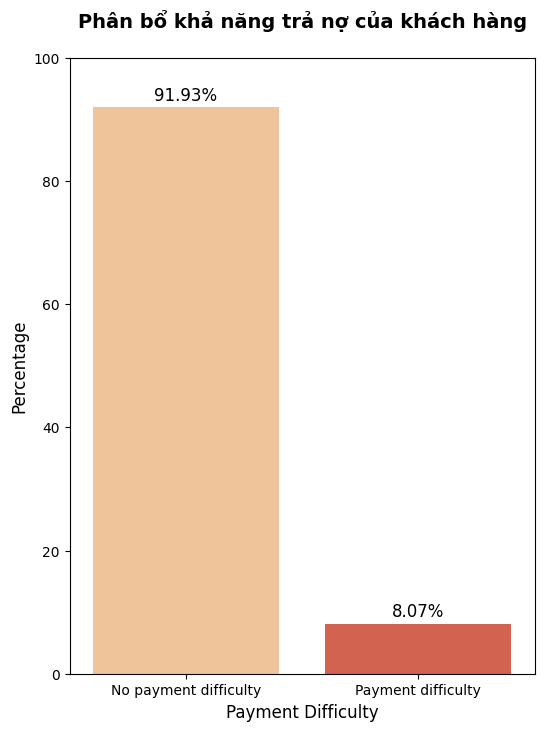

In [7]:
#rename column index
df_train_2 = df_train.copy()

df_train_2['TARGET_DIFFICULTY'] = df_train_2['TARGET'].apply(lambda x: 'No payment difficulty' if x == 0 else 'Payment difficulty')
target_percent = df_train_2['TARGET_DIFFICULTY'].value_counts(normalize=True).reset_index()
target_percent.rename(columns={'TARGET_DIFFICULTY':'Difficulty'},inplace=True)
target_percent['proportion'] = round(target_percent['proportion']*100,2)
target_percent
#plot target difficulty
plt.figure(figsize=(6,8))
sns.barplot(x='Difficulty', y='proportion', data=target_percent, palette='OrRd', label='Payment Difficulty')

#add text
for i,value in enumerate(target_percent['proportion']):
    text= f'{value}%'
    plt.text(i, value+2, text, fontsize=12, ha='center', va='center')


#set ylim
plt.ylim (0,100)

#add label axis
plt.xlabel('Payment Difficulty',fontsize=12)
plt.ylabel('Percentage',fontsize=12)

#add title
plt.title('Phân bổ khả năng trả nợ của khách hàng\n',fontsize=14, fontweight ='bold')

* 91,93% khách hàng không gặp khó khăn trong thanh toán. Điều đó có nghĩa là hoạt động của công ty cho vay tốt và quản lý rủi ro cũng như đánh giá tín dụng tốt.
* 8,07% khách hàng gặp khó khăn trong thanh toán. Điều đó có nghĩa là công ty cho vay cần phân tích đặc điểm của khách hàng để có thể nhận diện các dấu hiệu cảnh báo sớm và thực hiện các biện pháp giảm thiểu khả năng khách hàng không trả được nợ.

**Contract Type và Target**


In [8]:
df_contract = df_train_2.groupby(['NAME_CONTRACT_TYPE','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

In [9]:
df_contract.reset_index(inplace=True)
df_contract.drop(columns=['index'], inplace=True)
df_contract

,NAME_CONTRACT_TYPE,TARGET_DIFFICULTY,CUSTOMER
0,Cash loans,No payment difficulty,255011
1,Revolving loans,No payment difficulty,27675
2,Cash loans,Payment difficulty,23221
3,Revolving loans,Payment difficulty,1604


In [10]:
df_contract['Percentage'] = round((df_contract['CUSTOMER']/df_contract['CUSTOMER'].sum())*100,2)


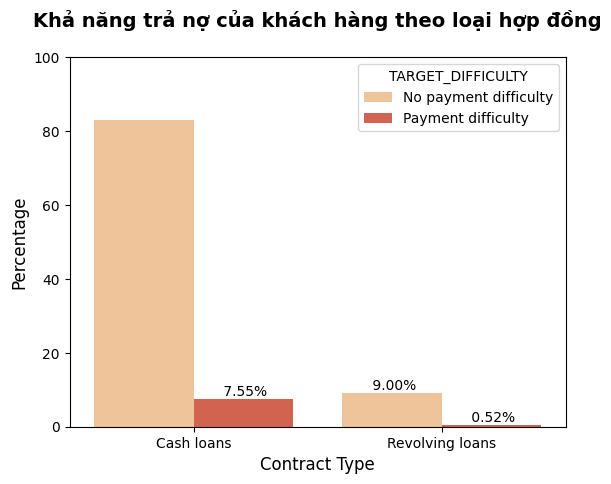

In [11]:
ax = sns.barplot(x='NAME_CONTRACT_TYPE', y='Percentage', hue='TARGET_DIFFICULTY', data=df_contract, palette='OrRd')

#add text
for p in ax.patches:
    percentage = f'{p.get_height() : .2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 2
    if (x>0):
      ax.annotate(percentage, (x,y), size=10, ha='center', va='center')


#set ylim
plt.ylim(0,100)

#set title
plt.title('Khả năng trả nợ của khách hàng theo loại hợp đồng\n', fontsize=14, fontweight='bold')

#set label
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

plt.show()

* **82,93% khách hàng không gặp khó khăn trong thanh toán có loại hợp đồng cho vay tiền mặt và chỉ 9% chọn loại hợp đồng cho vay quay vòng.**
* Khoản vay bằng tiền mặt là loại khoản vay mà người đi vay nhận trước một khoản tiền một lần và đồng ý trả theo số tiền cố định, trả góp đều đặn trong một khoảng thời gian (kỳ hạn) xác định.
* Các khoản vay tiền mặt phù hợp với các mục đích cụ thể như mua nhà hoặc ô tô Khoản vay quay vòng là loại khoản vay cung cấp cho người đi vay một hạn mức tín dụng và người đi vay có thể sử dụng, hoàn trả và tái sử dụng khoản tín dụng đó nếu cần. Hình thức cho vay quay vòng phổ biến nhất là thẻ tín dụng.
* **Lý do tại sao khoản vay tiền mặt được ưu tiên là Mục đích cụ thể như mua nhà, Hoàn trả có thể dự đoán được, biết chính xác số tiền của mỗi đợt và có kế hoạch trả nợ có cấu trúc với thời hạn nhất định.**

**Gender VS Target Difficulty**


In [12]:
df_gender = df_train_2.groupby(['CODE_GENDER','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)


In [13]:
df_gender.reset_index(inplace=True)
df_gender.drop('index', axis=1, inplace=True)

In [14]:
df_gender['Percentage'] = round((df_gender['CUSTOMER']/df_gender['CUSTOMER'].sum())*100,2)


In [15]:
df_gender['CODE_GENDER'] = df_gender['CODE_GENDER'].apply(lambda x: 'Female' if x == 'F' else 'Male')
df_gender

,CODE_GENDER,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Female,No payment difficulty,188278,61.23
1,Male,No payment difficulty,94404,30.70
2,Female,Payment difficulty,14170,4.61
3,Male,Payment difficulty,10655,3.46
4,Male,No payment difficulty,4,0.00


In [16]:
df_gender.drop(4, inplace=True)


In [17]:
df_gender


,CODE_GENDER,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Female,No payment difficulty,188278,61.23
1,Male,No payment difficulty,94404,30.70
2,Female,Payment difficulty,14170,4.61
3,Male,Payment difficulty,10655,3.46


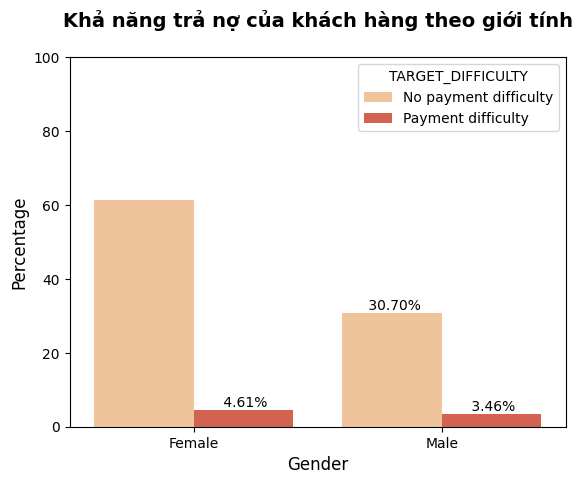

In [18]:
ax_2 = sns.barplot(x='CODE_GENDER', y='Percentage', hue='TARGET_DIFFICULTY', data=df_gender, palette='OrRd')

#add text
for p in ax_2.patches:
    percentage = f'{p.get_height() : .2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 2
    if x> 0:
      ax_2.annotate(percentage, (x,y), size=10, ha='center', va='center')

#set ylim
plt.ylim(0,100)

#set title
plt.title('Khả năng trả nợ của khách hàng theo giới tính\n', fontsize=14, fontweight='bold')

#set label
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

plt.show()

* 61,23% khách hàng không gặp khó khăn trong thanh toán là nữ và 30,70% là Nam. Kết quả phù hợp theo (Bermeo, 2018) rằng ở Anh, Phụ nữ chiếm 65% tổng số khách hàng của ngành tín dụng gia đình và phụ nữ cũng có xu hướng nhiều hơn làm việc cho ngành này với tư cách là đại lý cho vay.
* Tại thị trường này, nhu cầu hướng tới phụ nữ cao sẽ đáp ứng được lực lượng lao động đại lý có tính nữ tính cao.

**Suite Type VS Target Difficulty**


In [19]:
df_suite = df_train_2.groupby(['NAME_TYPE_SUITE','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

#reset index
df_suite.reset_index(inplace=True)

#drop column index
df_suite.drop('index', axis=1, inplace=True)
df_suite['Percentage'] = round((df_suite['CUSTOMER']/df_suite['CUSTOMER'].sum())*100,2)

#display
df_suite

,NAME_TYPE_SUITE,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Unaccompanied,No payment difficulty,228189,74.52
1,Family,No payment difficulty,37140,12.13
2,Unaccompanied,Payment difficulty,20337,6.64
3,"Spouse, partner",No payment difficulty,10475,3.42
4,Children,No payment difficulty,3026,0.99
5,Family,Payment difficulty,3009,0.98
6,Other_B,No payment difficulty,1596,0.52
7,"Spouse, partner",Payment difficulty,895,0.29
8,Other_A,No payment difficulty,790,0.26
9,Group of people,No payment difficulty,248,0.08


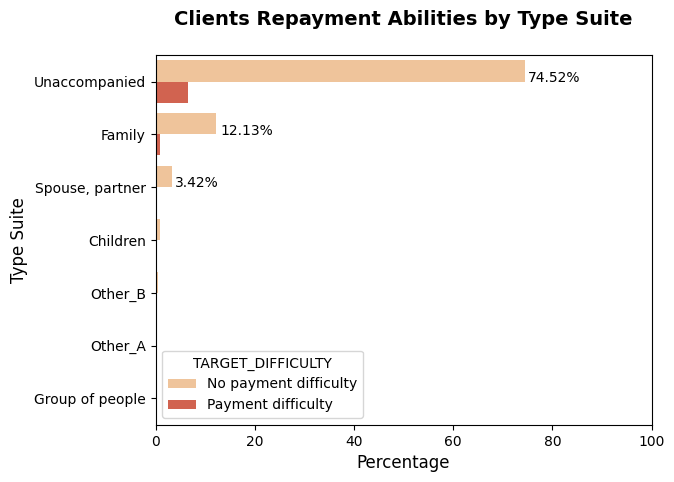

In [20]:
ax_5 = sns.barplot(y='NAME_TYPE_SUITE', x='Percentage', hue='TARGET_DIFFICULTY', data=df_suite, palette='OrRd', orient='horizontal')

#add text
plt.text(x=75, y=0, s=f"{df_suite['Percentage'][0]}%")
plt.text(x=13, y=1, s=f"{df_suite['Percentage'][1]}%")
plt.text(x=4, y=2, s=f"{df_suite['Percentage'][3]}%")

#set ylim
plt.xlim(0,100)

#set title
plt.title('Clients Repayment Abilities by Type Suite\n', fontsize=14, fontweight='bold')

#set label
plt.ylabel('Type Suite', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

plt.show()

* 74,52% khách hàng không gặp khó khăn trong thanh toán là không có người đi kèm
* Lý do hầu hết những người độc thân vay tín dụng mua nhà là vì họ có thể linh hoạt hơn trong việc quản lý tài chính và đưa ra quyết định chỉ dựa trên thu nhập và chi phí của bản thân. Điều này có thể giúp họ dễ dàng đủ điều kiện vay thế chấp và quản lý các trách nhiệm tài chính khi sở hữu nhà.

**Income Type VS Target Difficulty**

In [21]:
df_income = df_train_2.groupby(['NAME_INCOME_TYPE','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

#reset index
df_income.reset_index(inplace=True)

#drop column index
df_income.drop('index', axis=1, inplace=True)

In [22]:
df_income['Percentage'] = round((df_income['CUSTOMER']/df_income['CUSTOMER'].sum())*100,2)

#display
df_income

,NAME_INCOME_TYPE,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Working,No payment difficulty,143550,46.68
1,Commercial associate,No payment difficulty,66257,21.55
2,Pensioner,No payment difficulty,52380,17.03
3,State servant,No payment difficulty,20454,6.65
4,Working,Payment difficulty,15224,4.95
5,Commercial associate,Payment difficulty,5360,1.74
6,Pensioner,Payment difficulty,2982,0.97
7,State servant,Payment difficulty,1249,0.41
8,Student,No payment difficulty,18,0.01
9,Unemployed,No payment difficulty,14,0.00


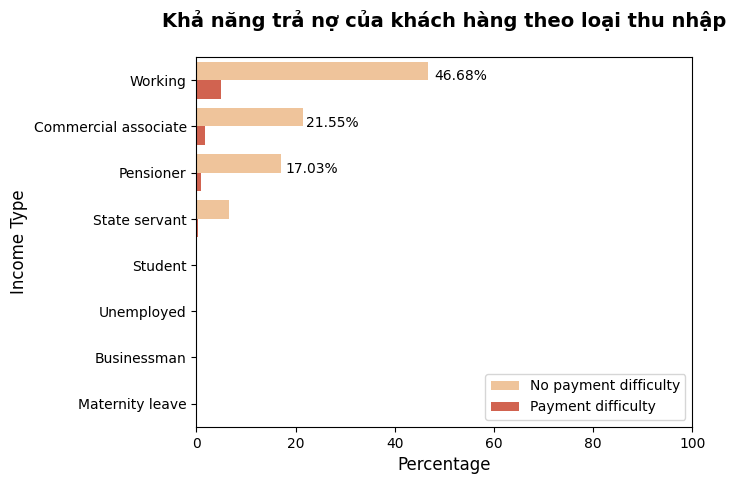

In [23]:
ax_6 = sns.barplot(y='NAME_INCOME_TYPE', x='Percentage', hue='TARGET_DIFFICULTY', data=df_income, palette='OrRd', orient='horizontal')

#add text
plt.text(x=48, y=0, s=f"{df_income['Percentage'][0]}%")
plt.text(x=22, y=1, s=f"{df_income['Percentage'][1]}%")
plt.text(x=18, y=2, s=f"{df_income['Percentage'][2]}%")

#set ylim
plt.xlim(0,100)

#set title
plt.title('Khả năng trả nợ của khách hàng theo loại thu nhập\n', fontsize=14, fontweight='bold')

#set label
plt.ylabel('Income Type', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

#legend
plt.legend(loc='lower right')

plt.show()

* 46,68% khách hàng không gặp khó khăn về thanh toán đang đi làm.
* Lý do hầu hết khách hàng là công nhân là vì những người đang đi làm thường có thu nhập đều đặn từ việc làm, điều này có thể khiến họ dễ dàng đủ điều kiện vay thế chấp hơn.

**Education Type VS Target Difficulty**


In [24]:
df_education = df_train_2.groupby(['NAME_EDUCATION_TYPE','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

#reset index
df_education.reset_index(inplace=True)

#drop column index
df_education.drop('index', axis=1, inplace=True)
#add column percentage
df_education['Percentage'] = round((df_education['CUSTOMER']/df_education['CUSTOMER'].sum())*100,2)

#display
df_education


,NAME_EDUCATION_TYPE,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Secondary / secondary special,No payment difficulty,198867,64.67
1,Higher education,No payment difficulty,70854,23.04
2,Secondary / secondary special,Payment difficulty,19524,6.35
3,Incomplete higher,No payment difficulty,9405,3.06
4,Higher education,Payment difficulty,4009,1.30
5,Lower secondary,No payment difficulty,3399,1.11
6,Incomplete higher,Payment difficulty,872,0.28
7,Lower secondary,Payment difficulty,417,0.14
8,Academic degree,No payment difficulty,161,0.05
9,Academic degree,Payment difficulty,3,0.00


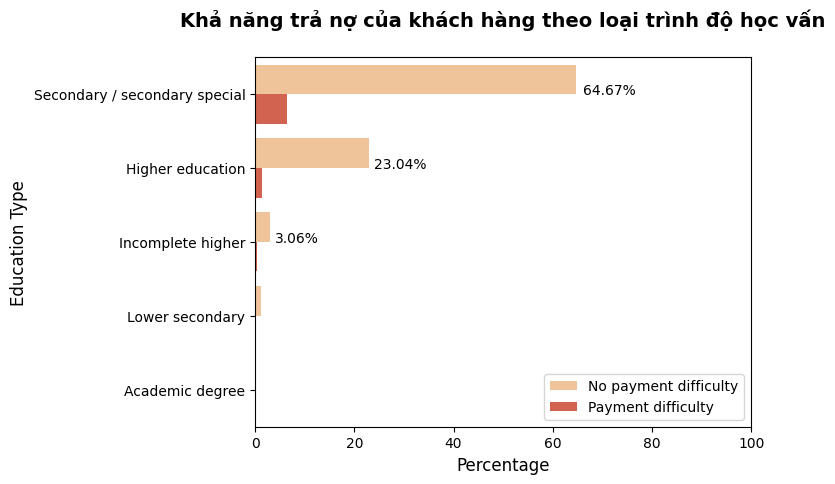

In [25]:
ax_7 = sns.barplot(y='NAME_EDUCATION_TYPE', x='Percentage', hue='TARGET_DIFFICULTY', data=df_education, palette='OrRd', orient='horizontal')

#add text
plt.text(x=66, y=0, s=f"{df_education['Percentage'][0]}%")
plt.text(x=24, y=1, s=f"{df_education['Percentage'][1]}%")
plt.text(x=4, y=2, s=f"{df_education['Percentage'][3]}%")

#set ylim
plt.xlim(0,100)

#set title
plt.title('Khả năng trả nợ của khách hàng theo loại trình độ học vấn\n', fontsize=14, fontweight='bold')

#set label
plt.ylabel('Education Type', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

#legend
plt.legend(loc='lower right')

plt.show()

* 64,67% khách hàng không gặp khó khăn trong thanh toán là có trình độ trung học cơ sở và 23,04% khách hàng có trình độ học vấn cao hơn Lý do hầu hết khách hàng có trình độ học vấn trung học là vì những cá nhân có trình độ học vấn cao hơn có thể có tiềm năng thu nhập cao hơn.
* Điều này có thể dẫn đến nhận thức rằng những người có trình độ trung học có nhiều khả năng nhận tín chỉ mua nhà hơn vì họ có thể có thu nhập trung bình thấp hơn.

**Family Status VS Target Difficulty**


In [26]:
df_family = df_train_2.groupby(['NAME_FAMILY_STATUS','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

#reset index
df_family.reset_index(inplace=True)

#drop column index
df_family.drop('index', axis=1, inplace=True)
#add column percentage
df_family['Percentage'] = round((df_family['CUSTOMER']/df_family['CUSTOMER'].sum())*100,2)

#display
df_family


,NAME_FAMILY_STATUS,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Married,No payment difficulty,181582,59.05
1,Single / not married,No payment difficulty,40987,13.33
2,Civil marriage,No payment difficulty,26814,8.72
3,Separated,No payment difficulty,18150,5.90
4,Widow,No payment difficulty,15151,4.93
5,Married,Payment difficulty,14850,4.83
6,Single / not married,Payment difficulty,4457,1.45
7,Civil marriage,Payment difficulty,2961,0.96
8,Separated,Payment difficulty,1620,0.53
9,Widow,Payment difficulty,937,0.30


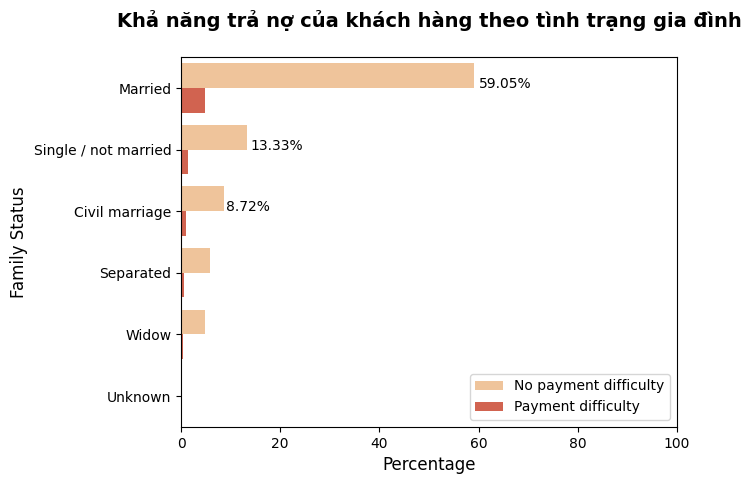

In [27]:
ax_8 = sns.barplot(y='NAME_FAMILY_STATUS', x='Percentage', hue='TARGET_DIFFICULTY', data=df_family, palette='OrRd', orient='horizontal')

#add text
plt.text(x=60, y=0, s=f"{df_family['Percentage'][0]}%")
plt.text(x=14, y=1, s=f"{df_family['Percentage'][1]}%")
plt.text(x=9, y=2, s=f"{df_family['Percentage'][2]}%")

#set ylim
plt.xlim(0,100)

#set title
plt.title('Khả năng trả nợ của khách hàng theo tình trạng gia đình\n', fontsize=14, fontweight='bold')

#set label
plt.ylabel('Family Status', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

#legend
plt.legend(loc='lower right')

plt.show()

* 59,05% khách hàng không gặp khó khăn trong thanh toán đã kết hôn và 13,33% khách hàng còn độc thân.
* Lý do phần lớn khách hàng là những người đã lập gia đình là vì họ thường lên kế hoạch cho tương lai, trong đó có khả năng lập gia đình. Việc sở hữu nhà được coi là mang lại môi trường sống ổn định và lâu dài cho trẻ em.

In [28]:
df_occupation = df_train_2.groupby(['OCCUPATION_TYPE','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

#reset index
df_occupation.reset_index(inplace=True)

#drop column index
df_occupation.drop('index', axis=1, inplace=True)
#add column percentage
df_occupation['Percentage'] = round((df_occupation['CUSTOMER']/df_occupation['CUSTOMER'].sum())*100,2)

#display
df_occupation

,OCCUPATION_TYPE,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Laborers,No payment difficulty,49348,23.37
1,Sales staff,No payment difficulty,29010,13.74
2,Core staff,No payment difficulty,25832,12.24
3,Managers,No payment difficulty,20043,9.49
4,Drivers,No payment difficulty,16496,7.81
5,High skill tech staff,No payment difficulty,10679,5.06
6,Accountants,No payment difficulty,9339,4.42
7,Medicine staff,No payment difficulty,7965,3.77
8,Security staff,No payment difficulty,5999,2.84
9,Laborers,Payment difficulty,5838,2.77


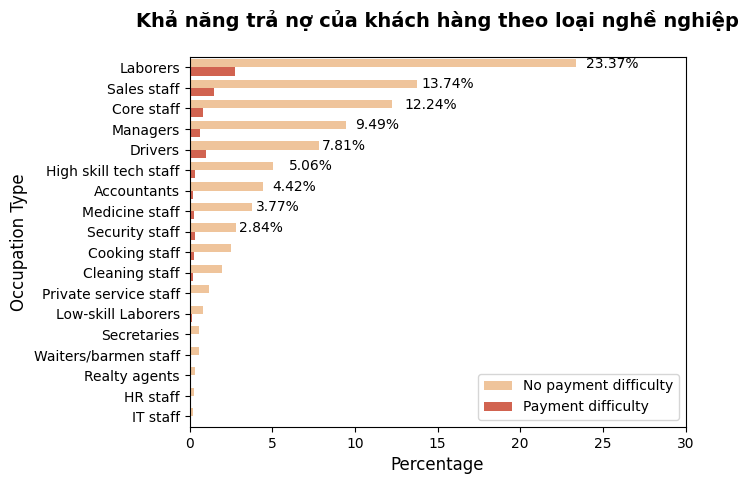

In [29]:
x_10 = sns.barplot(y='OCCUPATION_TYPE', x='Percentage', hue='TARGET_DIFFICULTY', data=df_occupation, palette='OrRd', orient='horizontal')

#add text
plt.text(x=24, y=0, s=f"{df_occupation['Percentage'][0]}%")
plt.text(x=14, y=1, s=f"{df_occupation['Percentage'][1]}%")
plt.text(x=13, y=2, s=f"{df_occupation['Percentage'][2]}%")
plt.text(x=10, y=3, s=f"{df_occupation['Percentage'][3]}%")
plt.text(x=8, y=4, s=f"{df_occupation['Percentage'][4]}%")
plt.text(x=6, y=5, s=f"{df_occupation['Percentage'][5]}%")
plt.text(x=5, y=6, s=f"{df_occupation['Percentage'][6]}%")
plt.text(x=4, y=7, s=f"{df_occupation['Percentage'][7]}%")
plt.text(x=3, y=8, s=f"{df_occupation['Percentage'][8]}%")

#set ylim
plt.xlim(0,30)

#set title
plt.title('Khả năng trả nợ của khách hàng theo loại nghề nghiệp\n', fontsize=14, fontweight='bold')

#set label
plt.ylabel('Occupation Type', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

#legend
plt.legend(loc='lower right')

plt.show()

* 23,37% khách hàng không gặp khó khăn trong thanh toán là người lao động.
*  Lý do hầu hết khách hàng vay mua nhà là người lao động là tùy thuộc vào loại công việc cụ thể mà họ tham gia, có thể có nhiều mức thu nhập khác nhau. Một số người lao động có thể có thu nhập khiến việc sở hữu nhà trở nên khả thi hơn, đặc biệt nếu họ có thể đảm bảo khoản thế chấp với các điều khoản phù hợp với khả năng tài chính của mình.

# Data cleaning

In [30]:
nums = df_train.select_dtypes(include=np.number).columns
cats = df_train.select_dtypes(exclude=np.number).columns

In [31]:
len(nums), len(cats)

(106, 16)

In [32]:
df_train[nums].describe().round(2)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,3.075110e+05,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.0,307511.00,307511.0,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.0,307511.00,307511.0,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,1.687979e+05,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.0,0.82,0.2,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,2.371231e+05,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.0,0.38,0.4,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.0

In [33]:
df_train[cats].describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [34]:
# Kiểu dữ liệu
df_train.dtypes.value_counts()

,count
float64,65
int64,41
object,16


**Dữ liệu bị trùng**

In [35]:
df_train.duplicated().sum()

0

**Dữ liệu bị thiếu**

In [36]:
nvc = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


In [37]:
col_null = nvc.loc[nvc['Percentage']>50].index.tolist()
df_train.drop(columns = col_null, inplace = True)

In [38]:
df_train.shape

(307511, 81)

In [39]:
numericals = df_train.select_dtypes(exclude = 'object')
categoricals = df_train.select_dtypes(include = 'object')

In [40]:

for item in numericals:
    df_train[item] = df_train[item].fillna(df_train[item].median())

#replace missing values on categorical with mode
for item in categoricals:
    df_train[item] = df_train[item].fillna(df_train[item].mode().iloc[0])

In [41]:
df_train.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0


# Feature Selection

In [42]:
# 0: bad
# 1: good
df_train['TARGET'] = df_train['TARGET'].apply(lambda x: 1 if x == 0 else 0)
df_train['TARGET'].value_counts()


,count
TARGET,
1,282686
0,24825


In [43]:
# chia dữ liệu thành 80/20 trong khi vẫn giữ mức phân bổ các khoản nợ xấu trong tập kiểm tra giống như trong tập dữ liệu trước khi chia
X = df_train.drop('TARGET', axis = 1)
y = df_train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((246008, 80), (61503, 80), (246008,), (61503,))

In [44]:
X_train_cat = X_train.select_dtypes(include = 'object').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

In [45]:
print(list(X_train_num.columns))

['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',

In [46]:
print(list(X_train_cat.columns))

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']


## Categorical

In [47]:
# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
# chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result.merge(X_train_cat.describe().T.reset_index(), left_on ='Feature', right_on = 'index').sort_values(by = ['p-value', 'unique'])

,Feature,p-value,index,count,unique,top,freq
0,NAME_CONTRACT_TYPE,0.000000,NAME_CONTRACT_TYPE,246008,2,Cash loans,222521
2,FLAG_OWN_CAR,0.000000,FLAG_OWN_CAR,246008,2,N,162453
1,CODE_GENDER,0.000000,CODE_GENDER,246008,3,F,162038
6,NAME_EDUCATION_TYPE,0.000000,NAME_EDUCATION_TYPE,246008,5,Secondary / secondary special,174765
7,NAME_FAMILY_STATUS,0.000000,NAME_FAMILY_STATUS,246008,6,Married,157064
8,NAME_HOUSING_TYPE,0.000000,NAME_HOUSING_TYPE,246008,6,House / apartment,218329
5,NAME_INCOME_TYPE,0.000000,NAME_INCOME_TYPE,246008,8,Working,127003
9,OCCUPATION_TYPE,0.000000,OCCUPATION_TYPE,246008,18,Laborers,121229
11,ORGANIZATION_TYPE,0.000000,ORGANIZATION_TYPE,246008,58,Business Entity Type 3,54447
4,NAME_TYPE_SUITE,0.000420,NAME_TYPE_SUITE,246008,7,Unaccompanied,199937


Chọn data ?
* Low unique
* No null value
* lowest p-value


In [48]:
X_train['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Municipal apartment', 'Rented apartment',
       'With parents', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [49]:
X_train['NAME_INCOME_TYPE'].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant',
       'Student', 'Unemployed', 'Maternity leave', 'Businessman'],
      dtype=object)

In [50]:
selected_cat_cols = ['FLAG_OWN_CAR', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE']

In [51]:
X_train[selected_cat_cols].head()

,FLAG_OWN_CAR,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE
246542,N,F,Secondary / secondary special,Married,Pensioner
166649,Y,F,Higher education,Married,Commercial associate
213816,Y,M,Secondary / secondary special,Separated,Commercial associate
255236,N,F,Higher education,Single / not married,Working
254621,Y,M,Secondary / secondary special,Single / not married,Commercial associate


NAME_CONTRACT_TYPE, NAME_HOUSING_TYPE không chọn bởi vì có 1 biến tần suất cao

## Numerical

In [52]:
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_train_num.fillna(X_train_num.median()), y_train)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.merge(X_train_num.describe().T.reset_index(), left_on = 'Numerical_Feature', right_on = 'index').sort_values(['F-Score', 'count'], ascending=False).head(50)

,Numerical_Feature,F-Score,p values,index,count,mean,std,min,25%,50%,75%,max
27,EXT_SOURCE_2,6518.572206,0.000000e+00,EXT_SOURCE_2,246008.0,0.514372,0.190930,8.173617e-08,0.392632,0.565961,0.663433,8.549997e-01
28,EXT_SOURCE_3,5995.804669,0.000000e+00,EXT_SOURCE_3,246008.0,0.515593,0.174788,5.272652e-04,0.417100,0.535276,0.636376,8.960095e-01
7,DAYS_BIRTH,1522.372017,0.000000e+00,DAYS_BIRTH,246008.0,-16029.807331,4359.823101,-2.522900e+04,-19673.000000,-15739.000000,-12410.000000,-7.489000e+03
19,REGION_RATING_CLIENT_W_CITY,913.906244,0.000000e+00,REGION_RATING_CLIENT_W_CITY,246008.0,2.031239,0.502947,1.000000e+00,2.000000,2.000000,2.000000,3.000000e+00
18,REGION_RATING_CLIENT,860.350408,0.000000e+00,REGION_RATING_CLIENT,246008.0,2.052340,0.509193,1.000000e+00,2.000000,2.000000,2.000000,3.000000e+00
40,DAYS_LAST_PHONE_CHANGE,767.742734,0.000000e+00,DAYS_LAST_PHONE_CHANGE,246008.0,-963.104619,827.030181,-4.292000e+03,-1570.000000,-757.000000,-274.000000,0.000000e+00
10,DAYS_ID_PUBLISH,674.965486,0.000000e+00,DAYS_ID_PUBLISH,246008.0,-2993.689616,1509.386678,-7.197000e+03,-4298.000000,-3256.000000,-1716.000000,0.000000e+00
25,REG_CITY_NOT_WORK_CITY,630.086032,0.000000e+00,REG_CITY_NOT_WORK_CITY,246008.0,0.230395,0.421086,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
12,FLAG_EMP_PHONE,512.340368,0.000000e+00,FLAG_EMP_PHONE,246008.0,0.820290,0.383946,0.000000e+00,1.000000,1.000000,1.000000,1.000000e+00
42,FLAG_DOCUMENT_3,496.920318,0.000000e+00,FLAG_DOCUMENT_3,246008.0,0.709623,0.453937,0.000000e+00,0.000000,1.000000,1.000000,1.000000e+00


EXT_SOURCE -> External source's score.

In [53]:
temp_num_cols = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
                 'REG_CITY_NOT_LIVE_CITY', 'DAYS_EMPLOYED', 'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE', 'LIVE_CITY_NOT_WORK_CITY', 'AMT_CREDIT',
                 'FLAG_DOCUMENT_6', 'CNT_CHILDREN']

* Nhìn chung, hệ số tương quan tuyệt đối >0,7 giữa hai hoặc nhiều yếu tố dự báo cho thấy có hiện tượng đa cộng tuyến.
* Hệ số tương quan có độ lớn nằm trong khoảng từ 0,7 đến 0,9 biểu thị các biến có thể được coi là tương quan cao
* vì mục đích đơn giản và tránh các mô hình quá khớp

<Axes: >

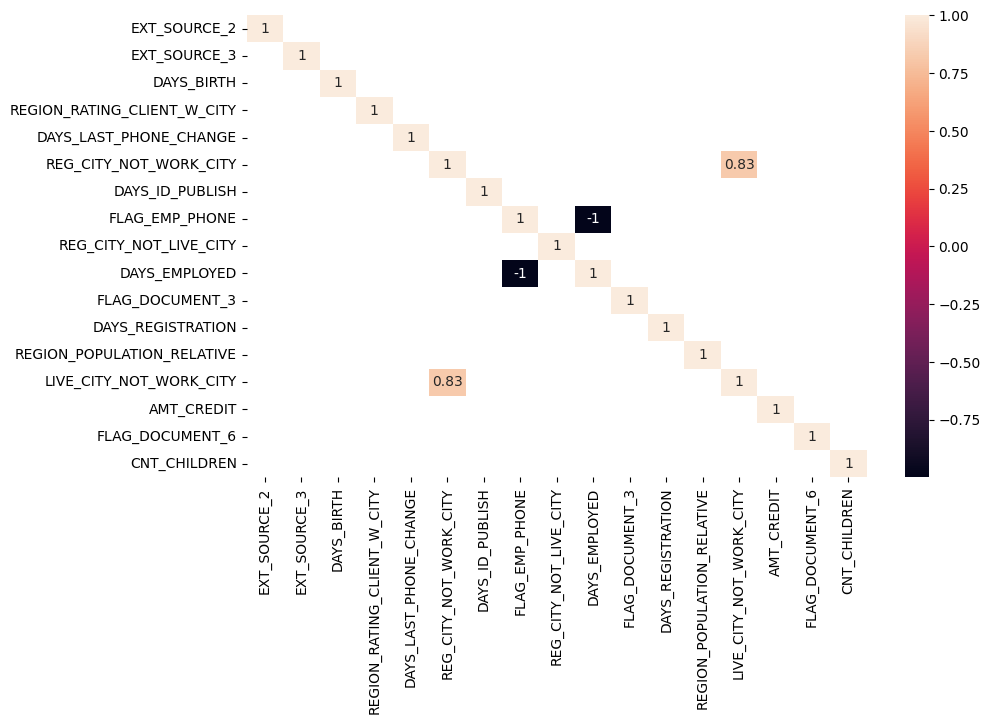

In [54]:
var_corr = X_train[temp_num_cols].corr()
fig = plt.figure(figsize = (10,6))
sns.heatmap(var_corr, annot=True, mask = (abs(var_corr) <= 0.7))

In [55]:
selected_num_cols = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_LIVE_CITY', 'DAYS_EMPLOYED',
                 'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE', 'LIVE_CITY_NOT_WORK_CITY', 'AMT_CREDIT', 'FLAG_DOCUMENT_6', 'CNT_CHILDREN']

In [56]:
X_train[selected_num_cols].head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_LIVE_CITY,DAYS_EMPLOYED,FLAG_DOCUMENT_3,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,LIVE_CITY_NOT_WORK_CITY,AMT_CREDIT,FLAG_DOCUMENT_6,CNT_CHILDREN
246542,0.391577,0.413597,-19980,2,-1591.0,-3270,0,365243,1,-7521.0,0.011703,0,127350.0,0,0
166649,0.707909,0.633032,-16598,1,-856.0,-129,0,-298,0,-7925.0,0.072508,0,1227901.5,0,0
213816,0.667288,0.466864,-21515,2,-650.0,-4028,0,-2174,1,-629.0,0.019101,0,1215000.0,0,0
255236,0.708474,0.535276,-13342,1,-3.0,-916,0,-5943,1,-7252.0,0.072508,0,450000.0,0,0
254621,0.595523,0.448962,-15974,3,-853.0,-568,0,-1130,1,-217.0,0.003122,0,545040.0,0,0


In [57]:
X_train[selected_num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 246008 entries, 246542 to 154255
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EXT_SOURCE_2                 246008 non-null  float64
 1   EXT_SOURCE_3                 246008 non-null  float64
 2   DAYS_BIRTH                   246008 non-null  int64  
 3   REGION_RATING_CLIENT_W_CITY  246008 non-null  int64  
 4   DAYS_LAST_PHONE_CHANGE       246008 non-null  float64
 5   DAYS_ID_PUBLISH              246008 non-null  int64  
 6   REG_CITY_NOT_LIVE_CITY       246008 non-null  int64  
 7   DAYS_EMPLOYED                246008 non-null  int64  
 8   FLAG_DOCUMENT_3              246008 non-null  int64  
 9   DAYS_REGISTRATION            246008 non-null  float64
 10  REGION_POPULATION_RELATIVE   246008 non-null  float64
 11  LIVE_CITY_NOT_WORK_CITY      246008 non-null  int64  
 12  AMT_CREDIT                   246008 non-null  float64
 13 

In [58]:
selected_cols = selected_cat_cols + selected_num_cols
len(selected_cols)

20

In [59]:
X_train = X_train[selected_cols]
X_test = X_test[selected_cols]

In [60]:
from sklearn.impute import SimpleImputer

numimputer = SimpleImputer(strategy = 'median')

In [61]:
X_train[selected_num_cols] = numimputer.fit_transform(X_train[selected_num_cols])
X_test[selected_num_cols] = numimputer.transform(X_test[selected_num_cols])

In [62]:
def dummy_creation(df, cols):
    df_dummies = pd.get_dummies(df[cols], prefix_sep = ':')
    df = pd.concat([df, df_dummies], axis = 1)
    return df

In [63]:
X_train.head()

,FLAG_OWN_CAR,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_LIVE_CITY,DAYS_EMPLOYED,FLAG_DOCUMENT_3,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,LIVE_CITY_NOT_WORK_CITY,AMT_CREDIT,FLAG_DOCUMENT_6,CNT_CHILDREN
246542,N,F,Secondary / secondary special,Married,Pensioner,0.391577,0.413597,-19980.0,2.0,-1591.0,-3270.0,0.0,365243.0,1.0,-7521.0,0.011703,0.0,127350.0,0.0,0.0
166649,Y,F,Higher education,Married,Commercial associate,0.707909,0.633032,-16598.0,1.0,-856.0,-129.0,0.0,-298.0,0.0,-7925.0,0.072508,0.0,1227901.5,0.0,0.0
213816,Y,M,Secondary / secondary special,Separated,Commercial associate,0.667288,0.466864,-21515.0,2.0,-650.0,-4028.0,0.0,-2174.0,1.0,-629.0,0.019101,0.0,1215000.0,0.0,0.0
255236,N,F,Higher education,Single / not married,Working,0.708474,0.535276,-13342.0,1.0,-3.0,-916.0,0.0,-5943.0,1.0,-7252.0,0.072508,0.0,450000.0,0.0,0.0
254621,Y,M,Secondary / secondary special,Single / not married,Commercial associate,0.595523,0.448962,-15974.0,3.0,-853.0,-568.0,0.0,-1130.0,1.0,-217.0,0.003122,0.0,545040.0,0.0,0.0


In [64]:
# One-hot coding categorical
X_train = dummy_creation(X_train, selected_cat_cols)
X_test = dummy_creation(X_test, selected_cat_cols)

In [65]:
selected_cat_cols

['FLAG_OWN_CAR',
 'CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_INCOME_TYPE']

In [66]:
X_test = X_test.reindex(labels=X_train.columns, axis=1, fill_value=0)

In [67]:
X_train.head()

,FLAG_OWN_CAR,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_LIVE_CITY,DAYS_EMPLOYED,FLAG_DOCUMENT_3,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,LIVE_CITY_NOT_WORK_CITY,AMT_CREDIT,FLAG_DOCUMENT_6,CNT_CHILDREN,FLAG_OWN_CAR:N,FLAG_OWN_CAR:Y,CODE_GENDER:F,CODE_GENDER:M,CODE_GENDER:XNA,NAME_EDUCATION_TYPE:Academic degree,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Lower secondary,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_FAMILY_STATUS:Civil marriage,NAME_FAMILY_STATUS:Married,NAME_FAMILY_STATUS:Separated,NAME_FAMILY_STATUS:Single / not married,NAME_FAMILY_STATUS:Unknown,NAME_FAMILY_STATUS:Widow,NAME_INCOME_TYPE:Businessman,NAME_INCOME_TYPE:Commercial associate,NAME_INCOME_TYPE:Maternity leave,NAME_INCOME_TYPE:Pensioner,NAME_INCOME_TYPE:State servant,NAME_INCOME_TYPE:Student,NAME_INCOME_TYPE:Unemployed,NAME_INCOME_TYPE:Working
246542,N,F,Secondary / secondary special,Married,Pensioner,0.391577,0.413597,-19980.0,2.0,-1591.0,-3270.0,0.0,365243.0,1.0,-7521.0,0.011703,0.0,127350.0,0.0,0.0,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False
166649,Y,F,Higher education,Married,Commercial associate,0.707909,0.633032,-16598.0,1.0,-856.0,-129.0,0.0,-298.0,0.0,-7925.0,0.072508,0.0,1227901.5,0.0,0.0,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
213816,Y,M,Secondary / secondary special,Separated,Commercial associate,0.667288,0.466864,-21515.0,2.0,-650.0,-4028.0,0.0,-2174.0,1.0,-629.0,0.019101,0.0,1215000.0,0.0,0.0,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False
255236,N,F,Higher education,Single / not married,Working,0.708474,0.535276,-13342.0,1.0,-3.0,-916.0,0.0,-5943.0,1.0,-7252.0,0.072508,0.0,450000.0,0.0,0.0,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
254621,Y,M,Secondary / secondary special,Single / not married,Commercial associate,0.595523,0.448962,-15974.0,3.0,-853.0,-568.0,0.0,-1130.0,1.0,-217.0,0.003122,0.0,545040.0,0.0,0.0,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False


# WoE Binning / Feature Engineering

In [68]:
pd.DataFrame({'Information Value': ['< 0.02', '0.02 - 0.1', '0.1 - 0.3', '0.3 - 0.5', '> 0.5'],
'Variable Predictiveness' : ['Not useful for prediction','Weak predictive power','Medium Predictive Power','Strong predictive power','suspicious predictive power']})

,Information Value,Variable Predictiveness
0,< 0.02,Not useful for prediction
1,0.02 - 0.1,Weak predictive power
2,0.1 - 0.3,Medium Predictive Power
3,0.3 - 0.5,Strong predictive power
4,> 0.5,suspicious predictive power


In [69]:
X_train_prepr = X_train.copy()
y_train_prepr = y_train.copy()
X_test_prepr = X_test.copy()
y_test_prepr = y_test.copy()

## Categorical

In [75]:
def woe_discrete(df, cat_variable_name, y_df):
    df = pd.concat([df[cat_variable_name], y_df], axis = 1)
    df = df.groupby(cat_variable_name, as_index=False).agg({df.columns[1]: ['count', 'sum']})
    df.columns = [cat_variable_name, 'n_obs', 'n_bad']
    df['n_good'] = df['n_obs'] - df['n_bad']

    # WOE
    df['total_dist'] = df['n_obs'] / df['n_obs'].sum()
    df['bad_dist'] = df['n_bad'] / df['n_bad'].sum()
    df['good_dist'] = df['n_good'] / df['n_good'].sum()
    df['WoE'] = np.log(df['good_dist'] / df['bad_dist'])
    df = df.sort_values(['WoE'])

    # IV
    df['IV'] = (df['good_dist'] - df['bad_dist']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df


In [76]:
selected_cat_cols

['FLAG_OWN_CAR',
 'CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_INCOME_TYPE']

In [77]:
selected_cols

['FLAG_OWN_CAR',
 'CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_INCOME_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'REGION_RATING_CLIENT_W_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'REG_CITY_NOT_LIVE_CITY',
 'DAYS_EMPLOYED',
 'FLAG_DOCUMENT_3',
 'DAYS_REGISTRATION',
 'REGION_POPULATION_RELATIVE',
 'LIVE_CITY_NOT_WORK_CITY',
 'AMT_CREDIT',
 'FLAG_DOCUMENT_6',
 'CNT_CHILDREN']

**FLAG_OWN_CAR**

In [78]:
df_temp = woe_discrete(X_train_prepr, 'FLAG_OWN_CAR', y_train_prepr)
df_temp

,FLAG_OWN_CAR,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
1,Y,83555,77536,6019,0.339643,0.342855,0.303072,-0.123339,0.007245
0,N,162453,148612,13841,0.660357,0.657145,0.696928,0.058778,0.007245


IV < 0.02 = Not useful for prediction

**CODE_GENDER**

In [79]:
df_temp = woe_discrete(X_train_prepr, 'CODE_GENDER', y_train_prepr)
df_temp

,CODE_GENDER,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
2,XNA,2,2,0,0.000008,0.000009,0.000000,-inf,inf
0,F,162038,150670,11368,0.658670,0.666245,0.572407,-0.151808,inf
1,M,83968,75476,8492,0.341322,0.333746,0.427593,0.247792,inf


In [80]:
X_train_prepr['CODE_GENDER'] = X_train_prepr['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

In [81]:
df_temp = woe_discrete(X_train_prepr, 'CODE_GENDER', y_train_prepr)
df_temp

,CODE_GENDER,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,F,162040,150672,11368,0.658678,0.666254,0.572407,-0.151821,0.037502
1,M,83968,75476,8492,0.341322,0.333746,0.427593,0.247792,0.037502


**NAME_EDUCATION_TYPE**

In [82]:
df_temp = woe_discrete(X_train_prepr, 'NAME_EDUCATION_TYPE', y_train_prepr)
df_temp

,NAME_EDUCATION_TYPE,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,Academic degree,124,121,3,0.000504,0.000535,0.000151,-1.264696,0.048773
1,Higher education,59829,56594,3235,0.243199,0.250252,0.162890,-0.429392,0.048773
2,Incomplete higher,8260,7547,713,0.033576,0.033372,0.035901,0.073058,0.048773
4,Secondary / secondary special,174765,159199,15566,0.710404,0.703959,0.783787,0.107416,0.048773
3,Lower secondary,3030,2687,343,0.012317,0.011882,0.017271,0.374032,0.048773


**NAME_FAMILY_STATUS**

In [83]:
df_temp = woe_discrete(X_train_prepr, 'NAME_FAMILY_STATUS', y_train_prepr)
df_temp

,NAME_FAMILY_STATUS,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
4,Unknown,1,1,0,0.000004,0.000004,0.000000,-inf,inf
5,Widow,12846,12102,744,0.052218,0.053514,0.037462,-0.356603,inf
1,Married,157064,145177,11887,0.638451,0.641956,0.598540,-0.070026,inf
2,Separated,15853,14568,1285,0.064441,0.064418,0.064703,0.004413,inf
3,Single / not married,36380,32817,3563,0.147881,0.145113,0.179406,0.212138,inf
0,Civil marriage,23864,21483,2381,0.097005,0.094995,0.119889,0.232741,inf


In [84]:
X_train_prepr['NAME_FAMILY_STATUS'] = X_train_prepr['NAME_FAMILY_STATUS'].apply(lambda x: 'Single / not married' if x == 'Unknown' else x)

In [85]:
df_temp = woe_discrete(X_train_prepr, 'NAME_FAMILY_STATUS', y_train_prepr)
df_temp

,NAME_FAMILY_STATUS,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
4,Widow,12846,12102,744,0.052218,0.053514,0.037462,-0.356603,0.021832
1,Married,157064,145177,11887,0.638451,0.641956,0.598540,-0.070026,0.021832
2,Separated,15853,14568,1285,0.064441,0.064418,0.064703,0.004413,0.021832
3,Single / not married,36381,32818,3563,0.147885,0.145117,0.179406,0.212108,0.021832
0,Civil marriage,23864,21483,2381,0.097005,0.094995,0.119889,0.232741,0.021832


**NAME_INCOME_TYPE**

In [86]:
df_temp = woe_discrete(X_train_prepr, 'NAME_INCOME_TYPE', y_train_prepr)
df_temp

,NAME_INCOME_TYPE,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,Businessman,9,9,0,0.000037,0.000040,0.000000,-inf,inf
5,Student,12,12,0,0.000049,0.000053,0.000000,-inf,inf
3,Pensioner,44190,41800,2390,0.179628,0.184835,0.120342,-0.429121,inf
4,State servant,17505,16518,987,0.071156,0.073041,0.049698,-0.385054,inf
1,Commercial associate,57266,52972,4294,0.232781,0.234236,0.216213,-0.080063,inf
7,Working,127003,114821,12182,0.516256,0.507725,0.613394,0.189067,inf
6,Unemployed,18,13,5,0.000073,0.000057,0.000252,1.476971,inf
2,Maternity leave,5,3,2,0.000020,0.000013,0.000101,2.027017,inf


In [87]:
def nameincometype(ityp):
    if ityp == 'Businessman':
        return 'Commercial associate'
    elif ityp == 'Maternity leave':
        return 'Pensioner'
    elif ityp == 'Student':
        return 'Unemployed'
    else:
        return ityp

In [88]:
X_train_prepr['NAME_INCOME_TYPE'] = X_train_prepr['NAME_INCOME_TYPE'].apply(nameincometype)

In [89]:
df_temp = woe_discrete(X_train_prepr, 'NAME_INCOME_TYPE', y_train_prepr)
df_temp

,NAME_INCOME_TYPE,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
1,Pensioner,44195,41803,2392,0.179649,0.184848,0.120443,-0.428356,0.05812
2,State servant,17505,16518,987,0.071156,0.073041,0.049698,-0.385054,0.05812
0,Commercial associate,57275,52981,4294,0.232818,0.234276,0.216213,-0.080233,0.05812
4,Working,127003,114821,12182,0.516256,0.507725,0.613394,0.189067,0.05812
3,Unemployed,30,25,5,0.000122,0.000111,0.000252,0.823044,0.05812


## Numerical

In [90]:
X_train_prepr[selected_num_cols].nunique().sort_values()

,0
REG_CITY_NOT_LIVE_CITY,2
FLAG_DOCUMENT_3,2
LIVE_CITY_NOT_WORK_CITY,2
FLAG_DOCUMENT_6,2
REGION_RATING_CLIENT_W_CITY,3
CNT_CHILDREN,14
REGION_POPULATION_RELATIVE,81
EXT_SOURCE_3,806
DAYS_LAST_PHONE_CHANGE,3737
AMT_CREDIT,5289


In [91]:
def woe_ordered_continuous(df, cat_variable_name, y_df):
    df = pd.concat([df[cat_variable_name], y_df], axis = 1)
    df = df.groupby(cat_variable_name, as_index=False).agg({df.columns[1]: ['count', 'sum']})
    df.columns = [cat_variable_name, 'n_obs', 'n_bad']
    df['n_good'] = df['n_obs'] - df['n_bad']

    # WOE
    df['total_dist'] = df['n_obs'] / df['n_obs'].sum()
    df['bad_dist'] = df['n_bad'] / df['n_bad'].sum()
    df['good_dist'] = df['n_good'] / df['n_good'].sum()
    df['WoE'] = np.log(df['good_dist'] / df['bad_dist'])
    #df = df.sort_values(['WoE'])

    # IV
    df['IV'] = (df['good_dist'] - df['bad_dist']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

**REG_CITY_NOT_LIVE_CITY**

In [92]:
df_temp = woe_ordered_continuous(X_train_prepr, 'REG_CITY_NOT_LIVE_CITY', y_train_prepr)
df_temp

,REG_CITY_NOT_LIVE_CITY,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,0.0,226815,209306,17509,0.921982,0.925527,0.881621,-0.048600,0.022482
1,1.0,19193,16842,2351,0.078018,0.074473,0.118379,0.463447,0.022482


**FLAG_DOCUMENT_3**

In [93]:
df_temp = woe_ordered_continuous(X_train_prepr, 'FLAG_DOCUMENT_3', y_train_prepr)
df_temp

,FLAG_DOCUMENT_3,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,0.0,71435,67034,4401,0.290377,0.296417,0.221601,-0.290886,0.029323
1,1.0,174573,159114,15459,0.709623,0.703583,0.778399,0.101052,0.029323


**LIVE_CITY_NOT_WORK_CITY**

In [94]:
df_temp = woe_ordered_continuous(X_train_prepr, 'LIVE_CITY_NOT_WORK_CITY', y_train_prepr)
df_temp

,LIVE_CITY_NOT_WORK_CITY,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,0.0,201813,186319,15494,0.820351,0.823881,0.780161,-0.054525,0.012078
1,1.0,44195,39829,4366,0.179649,0.176119,0.219839,0.221734,0.012078


IV < 0.02

**FLAG_DOCUMENT_6**

In [95]:
df_temp = woe_ordered_continuous(X_train_prepr, 'FLAG_DOCUMENT_6', y_train_prepr)
df_temp

,FLAG_DOCUMENT_6,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,0.0,224339,205678,18661,0.911917,0.909484,0.939627,0.032606,0.013191
1,1.0,21669,20470,1199,0.088083,0.090516,0.060373,-0.404991,0.013191


IV < 0.02

**REGION_RATING_CLIENT_W_CITY**

In [96]:
df_temp = woe_ordered_continuous(X_train_prepr, 'REGION_RATING_CLIENT_W_CITY', y_train_prepr)
df_temp

,REGION_RATING_CLIENT_W_CITY,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,1.0,27392,26071,1321,0.111346,0.115283,0.066516,-0.549953,0.051268
1,2.0,183539,168992,14547,0.746069,0.747263,0.732477,-0.019985,0.051268
2,3.0,35077,31085,3992,0.142585,0.137454,0.201007,0.380049,0.051268


**CNT_CHILDREN**

Problem: children count: 7,8,10,12,14,19

I think we should remove children > 6...

In [97]:
X_train_prepr_temp = X_train_prepr[X_train_prepr['CNT_CHILDREN'] <= 6].copy()

df_temp = woe_ordered_continuous(X_train_prepr_temp, 'CNT_CHILDREN', y_train_prepr)
df_temp

,CNT_CHILDREN,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,0.0,172178,158937,13241,0.699936,0.702847,0.666784,-0.052673,0.006808
1,1.0,49013,44591,4422,0.199247,0.197189,0.222681,0.121576,0.006808
2,2.0,21440,19567,1873,0.087158,0.086529,0.094320,0.086213,0.006808
3,3.0,2940,2673,267,0.011952,0.011820,0.013445,0.128808,0.006808
4,4.0,327,284,43,0.001329,0.001256,0.002165,0.544742,0.006808
5,5.0,75,69,6,0.000305,0.000305,0.000302,-0.009831,0.006808
6,6.0,18,12,6,0.000073,0.000053,0.000302,1.739369,0.006808


In [98]:
X_train_prepr.head()

,FLAG_OWN_CAR,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_LIVE_CITY,DAYS_EMPLOYED,FLAG_DOCUMENT_3,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,LIVE_CITY_NOT_WORK_CITY,AMT_CREDIT,FLAG_DOCUMENT_6,CNT_CHILDREN,FLAG_OWN_CAR:N,FLAG_OWN_CAR:Y,CODE_GENDER:F,CODE_GENDER:M,CODE_GENDER:XNA,NAME_EDUCATION_TYPE:Academic degree,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Lower secondary,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_FAMILY_STATUS:Civil marriage,NAME_FAMILY_STATUS:Married,NAME_FAMILY_STATUS:Separated,NAME_FAMILY_STATUS:Single / not married,NAME_FAMILY_STATUS:Unknown,NAME_FAMILY_STATUS:Widow,NAME_INCOME_TYPE:Businessman,NAME_INCOME_TYPE:Commercial associate,NAME_INCOME_TYPE:Maternity leave,NAME_INCOME_TYPE:Pensioner,NAME_INCOME_TYPE:State servant,NAME_INCOME_TYPE:Student,NAME_INCOME_TYPE:Unemployed,NAME_INCOME_TYPE:Working
246542,N,F,Secondary / secondary special,Married,Pensioner,0.391577,0.413597,-19980.0,2.0,-1591.0,-3270.0,0.0,365243.0,1.0,-7521.0,0.011703,0.0,127350.0,0.0,0.0,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False
166649,Y,F,Higher education,Married,Commercial associate,0.707909,0.633032,-16598.0,1.0,-856.0,-129.0,0.0,-298.0,0.0,-7925.0,0.072508,0.0,1227901.5,0.0,0.0,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
213816,Y,M,Secondary / secondary special,Separated,Commercial associate,0.667288,0.466864,-21515.0,2.0,-650.0,-4028.0,0.0,-2174.0,1.0,-629.0,0.019101,0.0,1215000.0,0.0,0.0,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False
255236,N,F,Higher education,Single / not married,Working,0.708474,0.535276,-13342.0,1.0,-3.0,-916.0,0.0,-5943.0,1.0,-7252.0,0.072508,0.0,450000.0,0.0,0.0,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
254621,Y,M,Secondary / secondary special,Single / not married,Commercial associate,0.595523,0.448962,-15974.0,3.0,-853.0,-568.0,0.0,-1130.0,1.0,-217.0,0.003122,0.0,545040.0,0.0,0.0,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False


Very low IV though.

**REGION_POPULATION_RELATIVE**

In [99]:
X_train_prepr['REGION_POPULATION_RELATIVE_factor'] = pd.cut(X_train_prepr['REGION_POPULATION_RELATIVE'], 5)
df_temp = woe_ordered_continuous(X_train_prepr, 'REGION_POPULATION_RELATIVE_factor', y_train_prepr)
df_temp

,REGION_POPULATION_RELATIVE_factor,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(0.000218, 0.0147]",90449,82858,7591,0.367667,0.366388,0.382226,0.042317,0.026641
1,"(0.0147, 0.0292]",100843,92053,8790,0.409918,0.407048,0.442598,0.083732,0.026641
2,"(0.0292, 0.0436]",37197,34520,2677,0.151202,0.152643,0.134794,-0.124360,0.026641
3,"(0.0436, 0.0581]",10829,10299,530,0.044019,0.045541,0.026687,-0.534443,0.026641
4,"(0.0581, 0.0725]",6690,6418,272,0.027194,0.028380,0.013696,-0.728578,0.026641


In [100]:
X_train_prepr['REGION_POPULATION_RELATIVE'].head()

,REGION_POPULATION_RELATIVE
246542,0.011703
166649,0.072508
213816,0.019101
255236,0.072508
254621,0.003122


**DAYS_LAST_PHONE_CHANGE**

In [101]:
# Very rough binning for days -> to year
def toyear(series):
    return -np.floor((series/365))

In [102]:
# fine-classing
X_train_prepr['YEAR_LAST_PHONE_CHANGE'] = toyear(X_train_prepr['DAYS_LAST_PHONE_CHANGE'])
X_train_prepr['YEAR_LAST_PHONE_CHANGE'] = pd.cut(X_train_prepr['YEAR_LAST_PHONE_CHANGE'], 6)

df_temp = woe_ordered_continuous(X_train_prepr, 'YEAR_LAST_PHONE_CHANGE', y_train_prepr)
df_temp

,YEAR_LAST_PHONE_CHANGE,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(-0.012, 2.0]",120240,108831,11409,0.488765,0.481238,0.574471,0.177088,0.046062
1,"(2.0, 4.0]",54154,49975,4179,0.220131,0.220984,0.210423,-0.048969,0.046062
2,"(4.0, 6.0]",48138,45116,3022,0.195677,0.199498,0.152165,-0.270836,0.046062
3,"(6.0, 8.0]",18782,17747,1035,0.076347,0.078475,0.052115,-0.409333,0.046062
4,"(8.0, 10.0]",4515,4308,207,0.018353,0.019049,0.010423,-0.603028,0.046062
5,"(10.0, 12.0]",179,171,8,0.000728,0.000756,0.000403,-0.629740,0.046062


**AMT_CREDIT**

In [103]:
# fine-classing
X_train_prepr['AMT_CREDIT_factor'] = pd.cut(X_train_prepr['AMT_CREDIT'], 5)

df_temp = woe_ordered_continuous(X_train_prepr, 'AMT_CREDIT_factor', y_train_prepr)
df_temp

,AMT_CREDIT_factor,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(40995.0, 846000.0]",190293,173858,16435,0.773524,0.768780,0.827543,0.073656,0.024318
1,"(846000.0, 1647000.0]",50714,47498,3216,0.206148,0.210031,0.161934,-0.260067,0.024318
2,"(1647000.0, 2448000.0]",4666,4470,196,0.018967,0.019766,0.009869,-0.694547,0.024318
3,"(2448000.0, 3249000.0]",317,305,12,0.001289,0.001349,0.000604,-0.802923,0.024318
4,"(3249000.0, 4050000.0]",18,17,1,0.000073,0.000075,0.000050,-0.400731,0.024318


**DAYS_ID_PUBLISH**

In [104]:
# fine-classing
X_train_prepr['YEAR_ID_PUBLISH'] = toyear(X_train_prepr['DAYS_ID_PUBLISH'])
X_train_prepr['YEAR_ID_PUBLISH'] = pd.cut(X_train_prepr['YEAR_ID_PUBLISH'], 5)

df_temp = woe_ordered_continuous(X_train_prepr, 'YEAR_ID_PUBLISH', y_train_prepr)
df_temp

,YEAR_ID_PUBLISH,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(-0.02, 4.0]",52241,46992,5249,0.212355,0.207793,0.264300,0.240542,0.035895
1,"(4.0, 8.0]",57096,52002,5094,0.232090,0.229947,0.256495,0.109263,0.035895
2,"(8.0, 12.0]",82861,76633,6228,0.336822,0.338862,0.313595,-0.077491,0.035895
3,"(12.0, 16.0]",53105,49850,3255,0.215867,0.220431,0.163897,-0.296344,0.035895
4,"(16.0, 20.0]",705,671,34,0.002866,0.002967,0.001712,-0.549927,0.035895


**DAYS_EMPLOYED**

In [105]:
# fine-classing
X_train_prepr['YEAR_EMPLOYED'] = toyear(X_train_prepr['DAYS_EMPLOYED'])
X_train_prepr['YEAR_EMPLOYED'] = pd.cut(X_train_prepr['YEAR_EMPLOYED'], 2)

df_temp = woe_ordered_continuous(X_train_prepr, 'YEAR_EMPLOYED', y_train_prepr)
df_temp

,YEAR_EMPLOYED,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(-1001.049, -475.5]",44200,41805,2395,0.179669,0.184857,0.120594,-0.427151,0.032326
1,"(-475.5, 49.0]",201808,184343,17465,0.820331,0.815143,0.879406,0.075883,0.032326


**DAYS_REGISTRATION**

In [106]:
# fine-classing
X_train_prepr['YEAR_REGISTRATION'] = toyear(X_train_prepr['DAYS_REGISTRATION'])
X_train_prepr['YEAR_REGISTRATION'] = pd.cut(X_train_prepr['YEAR_REGISTRATION'], 4)

df_temp = woe_ordered_continuous(X_train_prepr, 'YEAR_REGISTRATION', y_train_prepr)
df_temp

,YEAR_REGISTRATION,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(-0.068, 17.0]",161752,147509,14243,0.657507,0.652268,0.717170,0.094858,0.021206
1,"(17.0, 34.0]",76957,71726,5231,0.312823,0.317164,0.263394,-0.185769,0.021206
2,"(34.0, 51.0]",7246,6862,384,0.029454,0.030343,0.019335,-0.450630,0.021206
3,"(51.0, 68.0]",53,51,2,0.000215,0.000226,0.000101,-0.806196,0.021206


**DAYS_BIRTH**

In [107]:
# fine-classing
X_train_prepr['YEAR_BIRTH'] = toyear(X_train_prepr['DAYS_BIRTH'])
X_train_prepr['YEAR_BIRTH'] = pd.cut(X_train_prepr['YEAR_BIRTH'], 5)

df_temp = woe_ordered_continuous(X_train_prepr, 'YEAR_BIRTH', y_train_prepr)
df_temp

,YEAR_BIRTH,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(20.951, 30.8]",35997,31868,4129,0.146325,0.140917,0.207905,0.388915,0.080286
1,"(30.8, 40.6]",66020,59711,6309,0.268365,0.264035,0.317674,0.184943,0.080286
2,"(40.6, 50.4]",61326,56619,4707,0.249285,0.250363,0.237009,-0.054812,0.080286
3,"(50.4, 60.2]",54357,51027,3330,0.220956,0.225635,0.167674,-0.296901,0.080286
4,"(60.2, 70.0]",28308,26923,1385,0.115069,0.119050,0.069738,-0.534799,0.080286


**EXT_SOURCE_2**

In [108]:
# fine-classing
X_train_prepr['EXT_SOURCE_2_factor'] = pd.cut(X_train_prepr['EXT_SOURCE_2'], 10)

df_temp = woe_ordered_continuous(X_train_prepr, 'EXT_SOURCE_2_factor', y_train_prepr)
df_temp

,EXT_SOURCE_2_factor,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(-0.000855, 0.0855]",7616,5775,1841,0.030958,0.025536,0.092699,1.289253,0.317368
1,"(0.0855, 0.171]",10347,8599,1748,0.042060,0.038024,0.088016,0.839308,0.317368
2,"(0.171, 0.256]",13317,11477,1840,0.054132,0.050750,0.092649,0.601903,0.317368
3,"(0.256, 0.342]",18373,16274,2099,0.074685,0.071962,0.105690,0.384374,0.317368
4,"(0.342, 0.427]",20680,18595,2085,0.084062,0.082225,0.104985,0.244358,0.317368
5,"(0.427, 0.513]",28298,25915,2383,0.115029,0.114593,0.119990,0.046020,0.317368
6,"(0.513, 0.598]",43229,40136,3093,0.175722,0.177477,0.155740,-0.130650,0.317368
7,"(0.598, 0.684]",56324,53224,3100,0.228952,0.235350,0.156093,-0.410625,0.317368
8,"(0.684, 0.769]",42660,41103,1557,0.173409,0.181753,0.078399,-0.840838,0.317368
9,"(0.769, 0.855]",5164,5050,114,0.020991,0.022331,0.005740,-1.358463,0.317368


**EXT_SOURCE_3**

In [109]:
# fine-classing
X_train_prepr['EXT_SOURCE_3_factor'] = pd.cut(X_train_prepr['EXT_SOURCE_3'], 10)

df_temp = woe_ordered_continuous(X_train_prepr, 'EXT_SOURCE_3_factor', y_train_prepr)
df_temp

,EXT_SOURCE_3_factor,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(-0.000368, 0.0901]",3615,2675,940,0.014695,0.011829,0.047331,1.386657,0.320361
1,"(0.0901, 0.18]",9251,7381,1870,0.037604,0.032638,0.094159,1.059511,0.320361
2,"(0.18, 0.269]",13989,11863,2126,0.056864,0.052457,0.107049,0.713300,0.320361
3,"(0.269, 0.359]",19288,17139,2149,0.078404,0.075787,0.108207,0.356128,0.320361
4,"(0.359, 0.448]",24314,22190,2124,0.098834,0.098122,0.106949,0.086141,0.320361
5,"(0.448, 0.538]",77699,71184,6515,0.315839,0.314767,0.328046,0.041321,0.320361
6,"(0.538, 0.627]",32915,31205,1710,0.133796,0.137985,0.086103,-0.471603,0.320361
7,"(0.627, 0.717]",34333,32894,1439,0.139561,0.145453,0.072457,-0.696860,0.320361
8,"(0.717, 0.806]",24437,23638,799,0.099334,0.104524,0.040232,-0.954768,0.320361
9,"(0.806, 0.896]",6167,5979,188,0.025068,0.026438,0.009466,-1.027085,0.320361


## Define Custom Class for WoE Binning/Reengineering

In [110]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(246008, 44)
(246008,)
(61503, 44)
(61503,)


In [111]:
class WoE_Binning(BaseEstimator, TransformerMixin):
    def __init__(self, X): # no *args or *kargs
        self.X = X
    def fit(self, X, y = None):
        return self #nothing else to do
    def transform(self, X):
        X_new = X.loc[:, 'CODE_GENDER:M'].to_frame()
        X_new['CODE_GENDER:F_XNA'] = sum([X['CODE_GENDER:F'], X['CODE_GENDER:XNA']])

        X_new['NAME_EDUCATION_TYPE:Academic degree'] = X.loc[:,'NAME_EDUCATION_TYPE:Academic degree']
        X_new['NAME_EDUCATION_TYPE:Higher education'] = X.loc[:,'NAME_EDUCATION_TYPE:Higher education']
        X_new['NAME_EDUCATION_TYPE:Incomplete higher'] = X.loc[:,'NAME_EDUCATION_TYPE:Incomplete higher']
        X_new['NAME_EDUCATION_TYPE:Lower secondary'] = X.loc[:,'NAME_EDUCATION_TYPE:Lower secondary']
        X_new['NAME_EDUCATION_TYPE:Secondary / secondary special'] = X.loc[:,'NAME_EDUCATION_TYPE:Secondary / secondary special']

        X_new['NAME_FAMILY_STATUS:Single_Unknown'] = X['NAME_FAMILY_STATUS:Single / not married'] | X['NAME_FAMILY_STATUS:Unknown']
        X_new['NAME_FAMILY_STATUS:Civil marriage'] = X.loc[:,'NAME_FAMILY_STATUS:Civil marriage']
        X_new['NAME_FAMILY_STATUS:Married'] = X.loc[:,'NAME_FAMILY_STATUS:Married']
        X_new['NAME_FAMILY_STATUS:Separated'] = X.loc[:,'NAME_FAMILY_STATUS:Separated']
        X_new['NAME_FAMILY_STATUS:Widow'] = X.loc[:,'NAME_FAMILY_STATUS:Widow']

        X_new['NAME_INCOME_TYPE:Business_comm'] = X['NAME_INCOME_TYPE:Businessman'] | X['NAME_INCOME_TYPE:Commercial associate']
        X_new['NAME_INCOME_TYPE:Pensioner_maternity'] = X['NAME_INCOME_TYPE:Pensioner'] | X['NAME_INCOME_TYPE:Maternity leave']
        X_new['NAME_INCOME_TYPE:student_unemployed'] = X['NAME_INCOME_TYPE:Student'] | X['NAME_INCOME_TYPE:Unemployed']
        X_new['NAME_INCOME_TYPE:State servant'] = X.loc[:,'NAME_INCOME_TYPE:State servant']
        X_new['NAME_INCOME_TYPE:Working'] = X.loc[:,'NAME_INCOME_TYPE:Working']

        # numerical
        X_new['FLAG_DOCUMENT:0'] = np.where((X['REG_CITY_NOT_LIVE_CITY'] == 0), 1, 0)
        X_new['REG_CITY_NOT_LIVE_CITY:1'] = np.where((X['REG_CITY_NOT_LIVE_CITY'] == 1), 1, 0)

        X_new['FLAG_DOCUMENT_3:0'] = np.where((X['FLAG_DOCUMENT_3'] == 0), 1, 0)
        X_new['FLAG_DOCUMENT_3:1'] = np.where((X['FLAG_DOCUMENT_3'] == 1), 1, 0)

        X_new['REGION_RATING_CLIENT_W_CITY:0'] = np.where((X['REGION_RATING_CLIENT_W_CITY'] == 0), 1, 0)
        X_new['REGION_RATING_CLIENT_W_CITY:1'] = np.where((X['REGION_RATING_CLIENT_W_CITY'] == 1), 1, 0)
        X_new['REGION_RATING_CLIENT_W_CITY:2'] = np.where((X['REGION_RATING_CLIENT_W_CITY'] == 2), 1, 0)

        X_new['REGION_POPULATION_RELATIVE:<0.0147'] = np.where((X['REGION_POPULATION_RELATIVE'] <= 0.0147), 1, 0)
        X_new['REGION_POPULATION_RELATIVE:0.0147-0.0292'] = np.where((X['REGION_POPULATION_RELATIVE'] > 0.0147) & (X['REGION_POPULATION_RELATIVE'] <= 0.0292), 1, 0)
        X_new['REGION_POPULATION_RELATIVE:0.0292-0.0436'] = np.where((X['REGION_POPULATION_RELATIVE'] > 0.0292) & (X['REGION_POPULATION_RELATIVE'] <= 0.0436), 1, 0)
        X_new['REGION_POPULATION_RELATIVE:0.0436-0.0581'] = np.where((X['REGION_POPULATION_RELATIVE'] > 0.0436) & (X['REGION_POPULATION_RELATIVE'] <= 0.0581), 1, 0)
        X_new['REGION_POPULATION_RELATIVE:>0.0581'] = np.where((X['REGION_POPULATION_RELATIVE'] > 0.0581), 1, 0)

        X_new['YEAR_LAST_PHONE_CHANGE:<2'] = np.where((-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) <= 2), 1, 0)
        X_new['YEAR_LAST_PHONE_CHANGE:2-4'] = np.where((-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) > 2) & (-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) <= 4), 1, 0)
        X_new['YEAR_LAST_PHONE_CHANGE:4-6'] = np.where((-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) > 4) & (-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) <= 6), 1, 0)
        X_new['YEAR_LAST_PHONE_CHANGE:6-8'] = np.where((-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) > 6) & (-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) <= 8), 1, 0)
        X_new['YEAR_LAST_PHONE_CHANGE:8-10'] = np.where((-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) > 8) & (-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) <= 10), 1, 0)
        X_new['YEAR_LAST_PHONE_CHANGE:>10'] = np.where((-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) > 10), 1, 0)

        X_new['AMT_CREDIT:<846000'] = np.where((X['AMT_CREDIT'] <= 846000), 1, 0)
        X_new['AMT_CREDIT:846000-1647000'] = np.where((X['AMT_CREDIT'] > 846000) & (X['AMT_CREDIT'] <= 1647000), 1, 0)
        X_new['AMT_CREDIT:1647000-2448000'] = np.where((X['AMT_CREDIT'] > 1647000) & (X['AMT_CREDIT'] <= 2448000), 1, 0)
        X_new['AMT_CREDIT:2448000-3249000'] = np.where((X['AMT_CREDIT'] > 2448000) & (X['AMT_CREDIT'] <= 3249000), 1, 0)
        X_new['AMT_CREDIT:>3249000'] = np.where((X['AMT_CREDIT'] > 3249000), 1, 0)

        X_new['YEAR_ID_PUBLISH:<4'] = np.where((-np.floor(X['DAYS_ID_PUBLISH']/365) <= 4), 1, 0)
        X_new['YEAR_ID_PUBLISH:4-8'] = np.where((-np.floor(X['DAYS_ID_PUBLISH']/365) > 4) & (-np.floor(X['DAYS_ID_PUBLISH']/365) <= 8), 1, 0)
        X_new['YEAR_ID_PUBLISH:8-12'] = np.where((-np.floor(X['DAYS_ID_PUBLISH']/365) > 8) & (-np.floor(X['DAYS_ID_PUBLISH']/365) <= 12), 1, 0)
        X_new['YEAR_ID_PUBLISH:12-16'] = np.where((-np.floor(X['DAYS_ID_PUBLISH']/365) > 12) & (-np.floor(X['DAYS_ID_PUBLISH']/365) <= 16), 1, 0)
        X_new['YEAR_ID_PUBLISH:>16'] = np.where((-np.floor(X['DAYS_ID_PUBLISH']/365) > 16), 1, 0)

        X_new['YEAR_REGISTRATION:<17'] = np.where((-np.floor(X['DAYS_REGISTRATION']/365) <= 17), 1, 0)
        X_new['YEAR_REGISTRATION:17-34'] = np.where((-np.floor(X['DAYS_REGISTRATION']/365) > 17) & (-np.floor(X['DAYS_REGISTRATION']/365) <= 34), 1, 0)
        X_new['YEAR_REGISTRATION:34-51'] = np.where((-np.floor(X['DAYS_REGISTRATION']/365) > 34) & (-np.floor(X['DAYS_REGISTRATION']/365) <= 51), 1, 0)
        X_new['YEAR_REGISTRATION:>51'] = np.where((-np.floor(X['DAYS_REGISTRATION']/365) > 51), 1, 0)

        X_new['YEAR_BIRTH:<30'] = np.where((-np.floor(X['DAYS_BIRTH']/365) <= 30), 1, 0)
        X_new['YEAR_BIRTH:30-40'] = np.where((-np.floor(X['DAYS_BIRTH']/365) > 30) & (-np.floor(X['DAYS_BIRTH']/365) <= 40), 1, 0)
        X_new['YEAR_BIRTH:40-50'] = np.where((-np.floor(X['DAYS_BIRTH']/365) > 40) & (-np.floor(X['DAYS_BIRTH']/365) <= 50), 1, 0)
        X_new['YEAR_BIRTH:50-60'] = np.where((-np.floor(X['DAYS_BIRTH']/365) > 50) & (-np.floor(X['DAYS_BIRTH']/365) <= 60), 1, 0)
        X_new['YEAR_BIRTH:>60'] = np.where((-np.floor(X['DAYS_BIRTH']/365) > 60), 1, 0)

        X_new['EXT_SOURCE_2:<0.0855'] = np.where((X['EXT_SOURCE_2'] <= 0.0855), 1, 0)
        X_new['EXT_SOURCE_2:0.0855-0.171'] = np.where((X['EXT_SOURCE_2'] > 0.0855) & (X['EXT_SOURCE_2'] <= 0.171), 1, 0)
        X_new['EXT_SOURCE_2:0.171-0.256'] = np.where((X['EXT_SOURCE_2'] > 0.171) & (X['EXT_SOURCE_2'] <= 0.256), 1, 0)
        X_new['EXT_SOURCE_2:0.256-0.342'] = np.where((X['EXT_SOURCE_2'] > 0.256) & (X['EXT_SOURCE_2'] <= 0.342), 1, 0)
        X_new['EXT_SOURCE_2:0.342-0.427'] = np.where((X['EXT_SOURCE_2'] > 0.342) & (X['EXT_SOURCE_2'] <= 0.427), 1, 0)
        X_new['EXT_SOURCE_2:0.427-0.513'] = np.where((X['EXT_SOURCE_2'] > 0.427) & (X['EXT_SOURCE_2'] <= 0.513), 1, 0)
        X_new['EXT_SOURCE_2:0.513-0.598'] = np.where((X['EXT_SOURCE_2'] > 0.513) & (X['EXT_SOURCE_2'] <= 0.598), 1, 0)
        X_new['EXT_SOURCE_2:0.598-0.684'] = np.where((X['EXT_SOURCE_2'] > 0.598) & (X['EXT_SOURCE_2'] <= 0.684), 1, 0)
        X_new['EXT_SOURCE_2:0.684-0.769'] = np.where((X['EXT_SOURCE_2'] > 0.684) & (X['EXT_SOURCE_2'] <= 0.769), 1, 0)
        X_new['EXT_SOURCE_2:>0.769'] = np.where((X['EXT_SOURCE_2'] > 0.769), 1, 0)

        X_new['EXT_SOURCE_3:<0.0901'] = np.where((X['EXT_SOURCE_3'] <= 0.0901), 1, 0)
        X_new['EXT_SOURCE_3:0.0901-0.18'] = np.where((X['EXT_SOURCE_3'] > 0.0901) & (X['EXT_SOURCE_3'] <= 0.18), 1, 0)
        X_new['EXT_SOURCE_3:0.18-0.269'] = np.where((X['EXT_SOURCE_3'] > 0.18) & (X['EXT_SOURCE_3'] <= 0.269), 1, 0)
        X_new['EXT_SOURCE_3:0.269-0.359'] = np.where((X['EXT_SOURCE_3'] > 0.269) & (X['EXT_SOURCE_3'] <= 0.359), 1, 0)
        X_new['EXT_SOURCE_3:0.359-0.448'] = np.where((X['EXT_SOURCE_3'] > 0.359) & (X['EXT_SOURCE_3'] <= 0.448), 1, 0)
        X_new['EXT_SOURCE_3:0.448-0.538'] = np.where((X['EXT_SOURCE_3'] > 0.448) & (X['EXT_SOURCE_3'] <= 0.538), 1, 0)
        X_new['EXT_SOURCE_3:0.538-0.627'] = np.where((X['EXT_SOURCE_3'] > 0.538) & (X['EXT_SOURCE_3'] <= 0.627), 1, 0)
        X_new['EXT_SOURCE_3:0.627-0.717'] = np.where((X['EXT_SOURCE_3'] > 0.627) & (X['EXT_SOURCE_3'] <= 0.717), 1, 0)
        X_new['EXT_SOURCE_3:0.717-0.806'] = np.where((X['EXT_SOURCE_3'] > 0.717) & (X['EXT_SOURCE_3'] <= 0.806), 1, 0)
        X_new['EXT_SOURCE_3:>0.806'] = np.where((X['EXT_SOURCE_3'] > 0.806), 1, 0)
        # X_new.drop(columns = ref_categories, inplace = True)

        return X_new

# Model

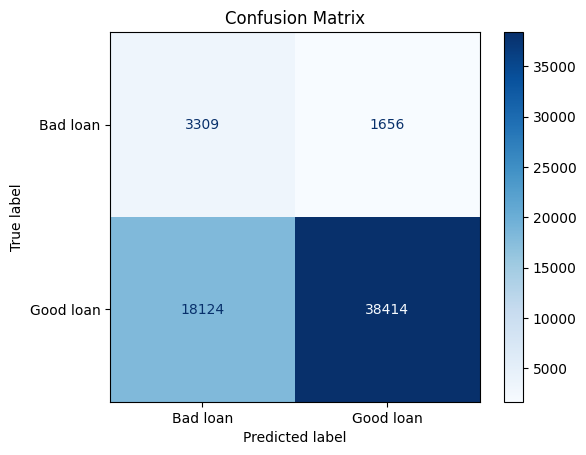

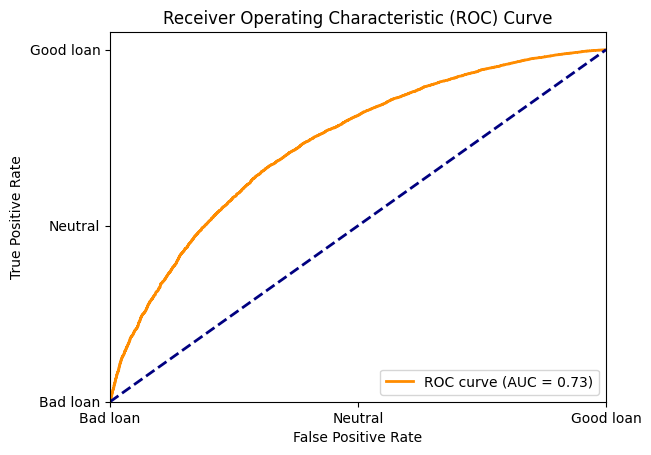

ROC AUC Score: 0.73


In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Khởi tạo Logistic Regression model
reg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Khởi tạo WoE_Binning (lấy X_train làm tham số nếu cần)
woe_transform = WoE_Binning(X_train)

# Tạo pipeline với các bước: WoE_Binning -> Logistic Regression
pipeline = Pipeline(steps=[('woe', woe_transform), ('model', reg)])

# Huấn luyện mô hình như trước
pipeline.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Dự đoán xác suất cho lớp 1

# Tính toán Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad loan', 'Good loan'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Tính toán ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Vẽ ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Đường chéo tham chiếu
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.xticks([0.0, 0.5, 1.0], labels=['Bad loan', 'Neutral', 'Good loan'])
plt.yticks([0.0, 0.5, 1.0], labels=['Bad loan', 'Neutral', 'Good loan'])
plt.show()

# In ra AUC Score
print(f'ROC AUC Score: {roc_auc:.2f}')


In [113]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.67      0.25      4965
           1       0.96      0.68      0.80     56538

    accuracy                           0.68     61503
   macro avg       0.56      0.67      0.52     61503
weighted avg       0.89      0.68      0.75     61503

Accuracy Score: 0.678389672048518
Recall Score: 0.6794368389401818
Precision Score: 0.9586723234339906
F1 Score: 0.7952550513415038


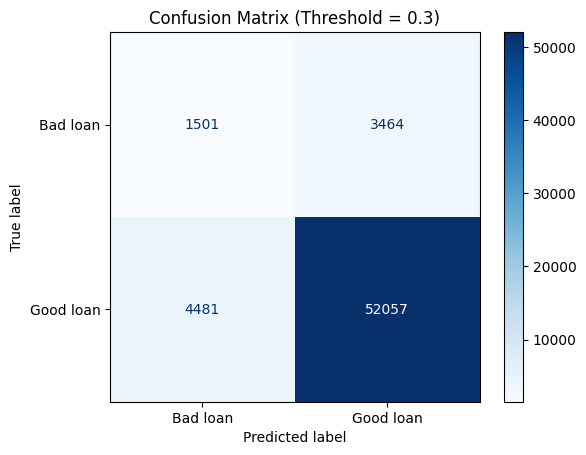

Accuracy: 0.87
Precision: 0.94
Recall: 0.92
F1-Score: 0.93


In [114]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Sử dụng ngưỡng cắt 0.3
threshold = 0.3
y_pred_threshold = (y_prob >= threshold).astype(int)

# Tính toán Confusion Matrix
cm_threshold = confusion_matrix(y_test, y_pred_threshold)

# Vẽ Confusion Matrix cho ngưỡng 0.3
disp_threshold = ConfusionMatrixDisplay(confusion_matrix=cm_threshold, display_labels=['Bad loan', 'Good loan'])
disp_threshold.plot(cmap='Blues')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()

# Tính các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')



Chọn ngưỡng cắt 0.3 vì không muốn mất đi khách hàng
